<h1>The severity of car accident </h1>

<p>Car accidents cost millions of lives loss and billions of money loss every year. The severity of a car accident is the most important factor in categorizing car accidents. The loss in lives and money depends on the severity of the car accident. </p>

<h4>Import the required packages</h4>

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<h4>Download the data collision file</h4>

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-30 17:51:48--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  22.7MB/s    in 3.1s    

2020-08-30 17:51:52 (22.7 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.columns

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [13]:
 df['SEVERITYCODE'].value_counts()

pandas.core.series.Series

In [5]:
df['SEVERITYCODE'].isnull().sum()

0

In [139]:
df2=df[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 
        'ROADCOND', 'LIGHTCOND',]]
df2.shape

(194673, 13)

In [140]:
df2['INCDATE'] = pd.to_datetime(df2['INCDATE'])
df2['DAY']=df2['INCDATE'].dt.dayofweek
df2['DAY'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4    32333
3    29324
2    28778
1    28556
5    27389
0    26338
6    21955
Name: DAY, dtype: int64

<h1>Exploratory Analysis</h1>

SEVER as a pie Chart

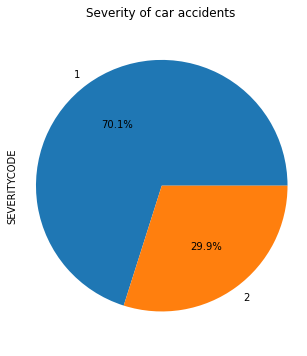

In [157]:
df3=df2['SEVERITYCODE'].value_counts()

df3.plot(kind='pie',
                        figsize=(5,6),
                        shadow=False,
                        autopct='%1.1f%%'
                        )

plt.title("Severity of car accidents")
plt.axis('equal')
plt.gcf().savefig('foo1.png')


plt.show()


In [104]:

df3=df2[['SEVERITYCODE','ROADCOND']]



Dry               70.130234
Wet               27.578420
Unknown            1.311091
Ice                0.477874
Snow/Slush         0.292326
Other              0.075270
Standing Water     0.052514
Oil                0.042011
Sand/Mud/Dirt      0.040260
Name: ROADCOND, dtype: float64

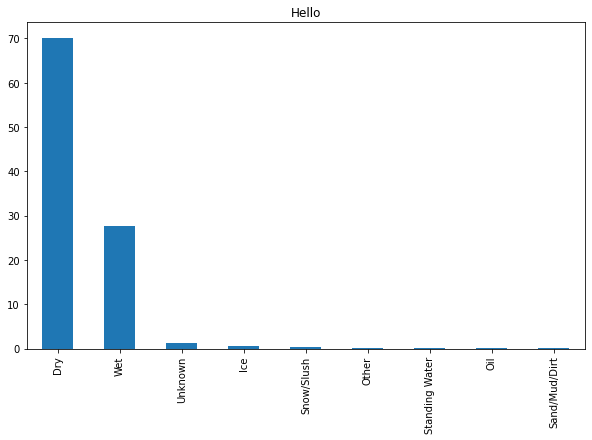

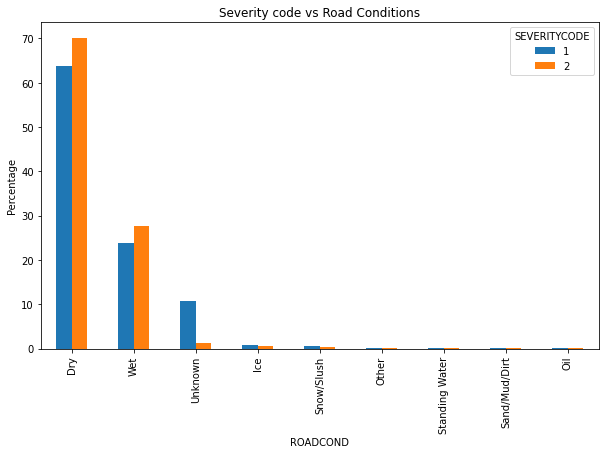

In [170]:
df3=df2[['SEVERITYCODE','ROADCOND']]

df5=pd.crosstab(df3.ROADCOND,df3.SEVERITYCODE)
df5.sort_values([1], axis=0, ascending=False,inplace=True)

df5[1]=df5[1]/df5[1].sum()*100
df5[2]=df5[2]/df5[2].sum()*100




df5.plot(kind='bar',
            figsize=(10,6),)

plt.title('Severity code vs Road Conditions')
plt.ylabel('Percentage')
plt.gcf().savefig('foo2.png')


plt.show()



<h2>Figure 3 between Sever and Weather </h2>

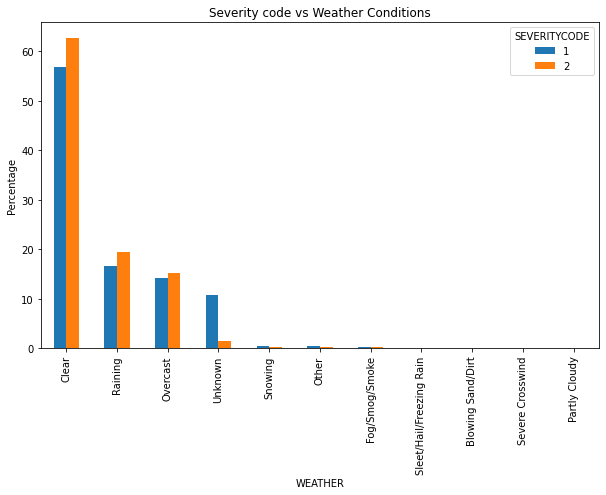

In [171]:
df3=df2[['SEVERITYCODE','WEATHER']]

df5=pd.crosstab(df3.WEATHER,df3.SEVERITYCODE)
df5.sort_values([1], axis=0, ascending=False,inplace=True)

df5[1]=df5[1]/df5[1].sum()*100
df5[2]=df5[2]/df5[2].sum()*100

df5.plot(kind='bar',
            figsize=(10,6),)

plt.title('Severity code vs Weather Conditions')
plt.ylabel('Percentage')
plt.gcf().savefig('foo3.png')


plt.show()




<h2>Figure 4 between Sever and Junctions </h2>

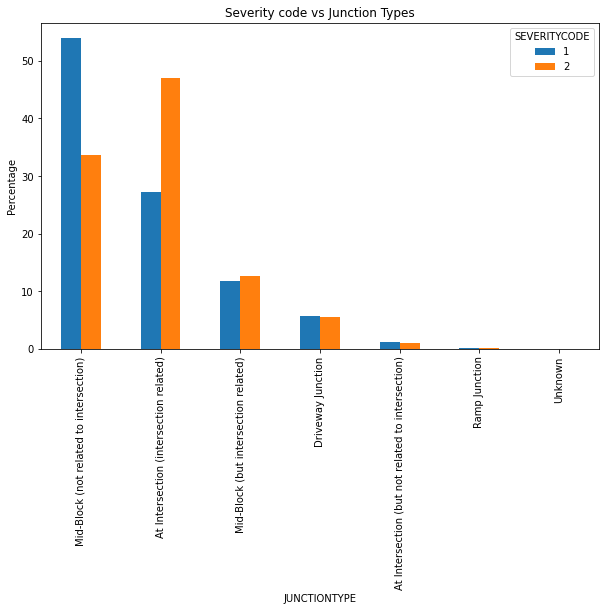

In [172]:
df3=df2[['SEVERITYCODE','JUNCTIONTYPE']]

df5=pd.crosstab(df3.JUNCTIONTYPE,df3.SEVERITYCODE)
df5.sort_values([1], axis=0, ascending=False,inplace=True)

df5[1]=df5[1]/df5[1].sum()*100
df5[2]=df5[2]/df5[2].sum()*100

df5.plot(kind='bar',
            figsize=(10,6),)

plt.title('Severity code vs Junction Types')
plt.ylabel('Percentage')
plt.gcf().savefig('foo4.png')
plt.show()





<h2>Figure 5 between Sever and Attention </h2>

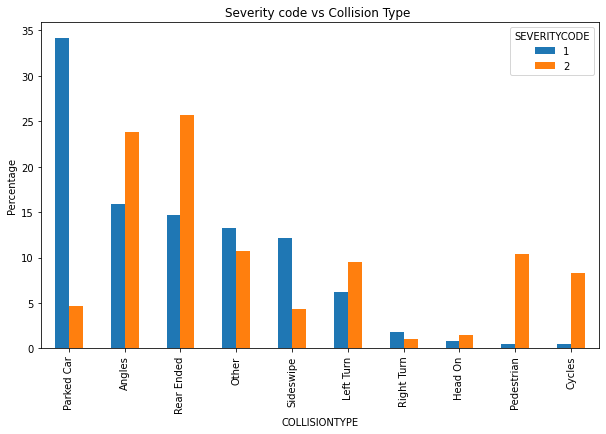

In [173]:
df3=df2[['SEVERITYCODE','COLLISIONTYPE']]

df5=pd.crosstab(df3.COLLISIONTYPE,df3.SEVERITYCODE)
df5.sort_values([1], axis=0, ascending=False,inplace=True)

df5[1]=df5[1]/df5[1].sum()*100
df5[2]=df5[2]/df5[2].sum()*100

df5.plot(kind='bar',
            figsize=(10,6),)

plt.title('Severity code vs Collision Type ')
plt.ylabel('Percentage')
plt.gcf().savefig('foo6.png')
plt.show()


In [143]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [165]:
df3=df2[['SEVERITYCODE','COLLISIONTYPE']]

df5=pd.crosstab(df3.COLLISIONTYPE,df3.SEVERITYCODE)
df5.sort_values([1], axis=0, ascending=False,inplace=True)



COLLISIONTYPE
Parked Car    45325
Angles        21050
Rear Ended    19419
Other         17591
Sideswipe     16103
Left Turn      8292
Right Turn     2347
Head On        1152
Pedestrian      672
Cycles          671
Name: 1, dtype: int64

<h1>Model Predictions</h1>

<h3> Changing the categorial variables into numerics </h3>

In [4]:
train=df.copy()
train['ROADCOND'] = train['ROADCOND'].astype('category').cat.codes
train['WEATHER'] = train['WEATHER'].astype('category').cat.codes
train['JUNCTIONTYPE'] = train['JUNCTIONTYPE'].astype('category').cat.codes
train['COLLISIONTYPE'] = train['COLLISIONTYPE'].astype('category').cat.codes






#value_mapper = dict(zip(train['ROADCOND'].unique(), np.arange(1, train['ROADCOND'].nunique()+4)))
#train['ROADCOND'].replace(value_mapper, inplace=True)
df['ROADCOND'].value_counts()
train['ROADCOND'].value_counts()



 0    124510
 8     47474
 7     15078
-1      5012
 1      1209
 5      1004
 3       132
 6       115
 4        75
 2        64
Name: ROADCOND, dtype: int64

array([2, 1, 1, 1, 2])

In [5]:
Feature = train[['ROADCOND','WEATHER','JUNCTIONTYPE','COLLISIONTYPE']]

Feature.head()
X = Feature
X[0:5]
y = df['SEVERITYCODE'].values
y[0:5]
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  


array([[ 1.50545441,  0.35364615, -1.06281401, -1.51529661],
       [ 1.50545441,  1.04520829,  0.92914878,  1.60875294],
       [-0.68713674,  0.35364615,  0.92914878,  0.22028647],
       [-0.68713674, -0.68369706,  0.92914878, -0.12683015],
       [ 1.50545441,  1.04520829, -1.06281401, -1.51529661]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks=8
mean_acc = np.zeros((Ks-1))
std_acc = np. zeros((Ks-1))
ConfustionMx=[];

for n in range(1,Ks):
    
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/ np.sqrt(yhat.shape[0])

mean_acc

array([0.68511622, 0.73170669, 0.71149351, 0.72433543, 0.71912161,
       0.74426608, 0.72600488])

In [13]:
print("The best accuracy was with", mean_acc.max(), " with k=", mean_acc.argmax()+1)



The best accuracy was with 0.7442660844998074  with k= 6


<h3>Decision Tree</h3>

In [9]:
from sklearn.tree import DecisionTreeClassifier


Tee=DecisionTreeClassifier(criterion='entropy', max_depth=4)
Tee.fit(X_train,y_train)
predTee=Tee.predict(X_test)
print(predTee[0:5])
print(y_test[0:5])

print('DecisionTree Accuracy:', metrics.accuracy_score(y_test,predTee))


[1 1 1 1 1]
[2 1 1 2 2]
DecisionTree Accuracy: 0.752459226916656


<h3> SVM</h3>

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

yyhat=clf.predict(X_test)

from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print(f1_score(y_test, yyhat, average='weighted'))
print(jaccard_similarity_score(y_test,yyhat))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h3> Reg</h3>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss


from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yyyhat=LR.predict(X_test)

print(f1_score(y_test, yyyhat, average='weighted'))
print(jaccard_similarity_score(y_test,yyyhat))
print(log_loss(y_test,LR.predict_proba(X_test)))

0.5852444396947257
0.7029407987671761
0.5895752499787502


In [14]:
XX=X_test
yy=y_test

neighh=KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
yht=neighh.predict(XX)

data = {'Algorithm':  ['KNN','Decision Tree', 'SVM', 'LogisticRegression'],
        'Jaccard':  [jaccard_similarity_score(yy,neighh.predict(XX)),
                     jaccard_similarity_score(yy,Tee.predict(XX)),
                     'NA',
                     jaccard_similarity_score(yy,LR.predict(XX))],
        'F1-score':  [f1_score(yy,neighh.predict(XX) , average='weighted'),
                      f1_score(yy,Tee.predict(XX) , average='weighted'),
                      'NA',
                      f1_score(yy, LR.predict(XX), average='weighted')],
        'LogLoss':  ['NA', 'NA','NA',log_loss(yy,LR.predict_proba(XX))]
       }
        
datf = pd.DataFrame (data, columns = ['Algorithm','Jaccard','F1-score','LogLoss'])
datf.set_index('Algorithm', inplace=True)
print(datf)   

                     Jaccard  F1-score   LogLoss
Algorithm                                       
KNN                 0.744266   0.69749        NA
Decision Tree       0.752459  0.689341        NA
SVM                       NA        NA        NA
LogisticRegression  0.702941  0.585244  0.589575
